# SVM Algorithm 

In [11]:
#Step N1 import Libraries and needed functions for easy logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Import dataset
df = pd.read_csv('Dataset.csv')

# Drop rows containing missing values
df = df.dropna(axis=0, how='any')

# Convert non-numeric data using one-hot encoding
df = pd.get_dummies(df, columns=['island', 'sex'])
#________________________________________________STANDARTIZATION_____________________________________________________________________________#
# Scale independent variables by dropping the dependent variable (Species)
scaler = StandardScaler()
scaler.fit(df.drop('species',axis=1))
scaled_features = scaler.transform(df.drop('species',axis=1))
#____________________________________________________________________________________________________________________________________________#

# Assign X and y variables
X = scaled_features
y = df['species']

# Split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

#_________________________________________________________Assign SVC_________________________________________________________________________#
model = SVC()
#____________________________________________________________________________________________________________________________________________#

# Fit algorithm to data
model.fit(X_train, y_train)

# Run algorithm on test data to make predictions
model_test = model.predict(X_test)

# Evaluate predictions
print(confusion_matrix(y_test, model_test)) 
print(classification_report(y_test, model_test))


[[45  0  0]
 [ 0 18  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        45
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        37

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [9]:
# Data point to predict
penguin = [
	39, #bill_length_mm
	18.5, #bill_depth_mm
	180, #flipper_length_mm 
	3750, #body_mass_g
	0, #island_Biscoe    
	0, #island_Dream
	1, #island_Torgersen    
	1, #sex_Male
	0, #sex_Female
]

# Make prediction
new_penguin = model.predict([penguin])
new_penguin


array(['Adelie'], dtype=object)

# Process Explained step by step:

1<n>) Okay firstly we import the libraries and a dataset <br>
2) Then we drop any incomplete data points (i.e containing Nan value)<br>
3) after we use one hot encoding to eliminate all the non numeric values <br> 
<h3>4) Then we introduce the <b>Scaler</b> To scale the results. By this line of code we start an instance of StandartScaler <code>scaler = StandardScaler()</code><br>
5) Then we calculate mean and standart deviation for every Independent Variable (i.e except the dependent variable)<code>scaler.fit(df.drop('species',axis=1))</code><br>
6) after that we use this line to <code>scaled_features = scaler.transform(df.drop('species',axis=1))</code> Uses the computed mean & std to transform the dataset, standardizing each feature.</h3>
7)Then we assign independent and dependent variables (our dependent variable is going to be species. we are trying to find what species is the penguin depending on it's characteristics) <b>Dependent Variable: Species </b> <br> 
8) Then we just shuffle the data and split it into training and test data <br> 
9) Then we just assign our algorithm specific model. for this problem we choose <b>SVC()</b> <br>
10) Then we just fit the model to Training data by this line <code>model.fit(X_train, y_train)</code><br>
11)Then run our algorithm on Test Data to predict the accuracy <code>model_test = model.predict(X_test)</code><br>
12)Accuracy check:<code>print(confusion_matrix(y_test, model_test))</code>
<code>print(classification_report(y_test, model_test))</code> By these lines of code we basically tell the program to print the confusion matrix and classification report which can be used to predict the accuracy of the model<br>
13) Lastly we want to make a SPECIES prediction based on an actual penguin so we create an array penguin put all the related data<br>
14) <code>new_penguin = model.predict([penguin])</code> By this line of code we test our jimmy penguin into our Algorithm and see the prediction


# Things You didn't know:

Standartizing the Data (idk why, but I guess I know how). By these lines we can standartize and assign new standartized data to our model.

<code>scaler = StandardScaler()
scaler.fit(df.drop('species',axis=1))
scaled_features = scaler.transform(df.drop('species',axis=1))</code>

using different algorithm: 
<code>model = SVC()</code>
### SVM IS GENERALLY STRONGER THAN LOGISTIC REGRESSION

# Important Things to remember:

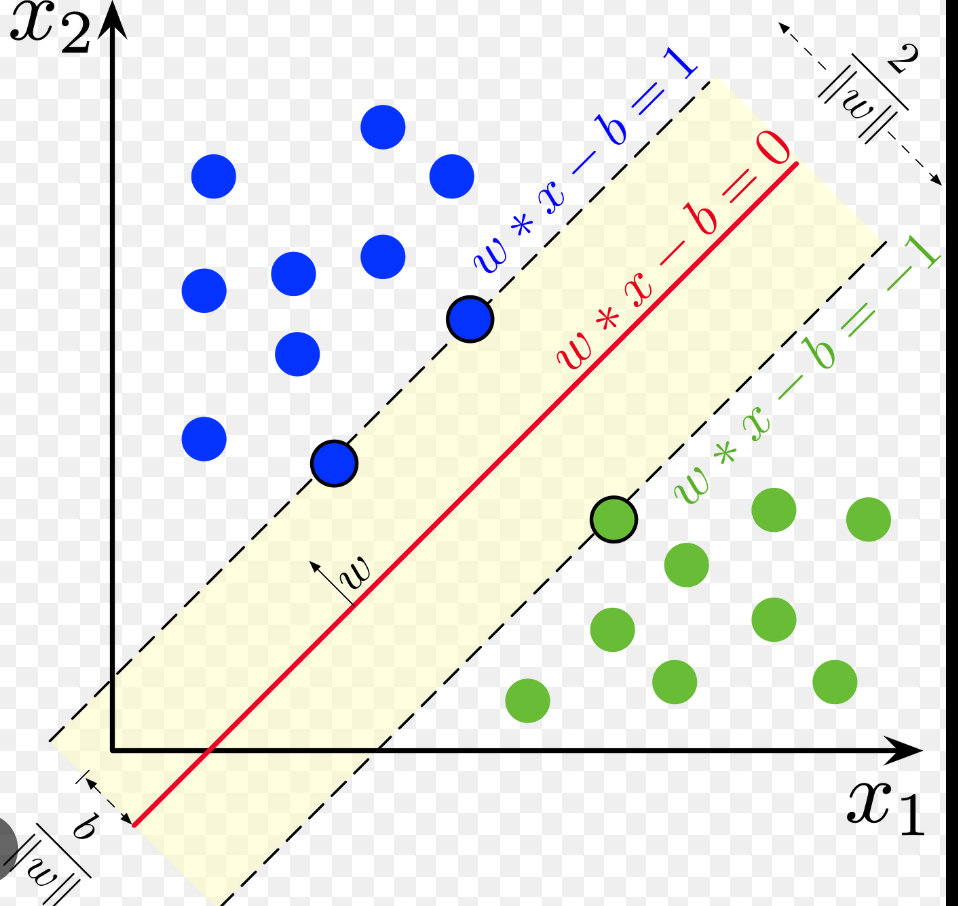

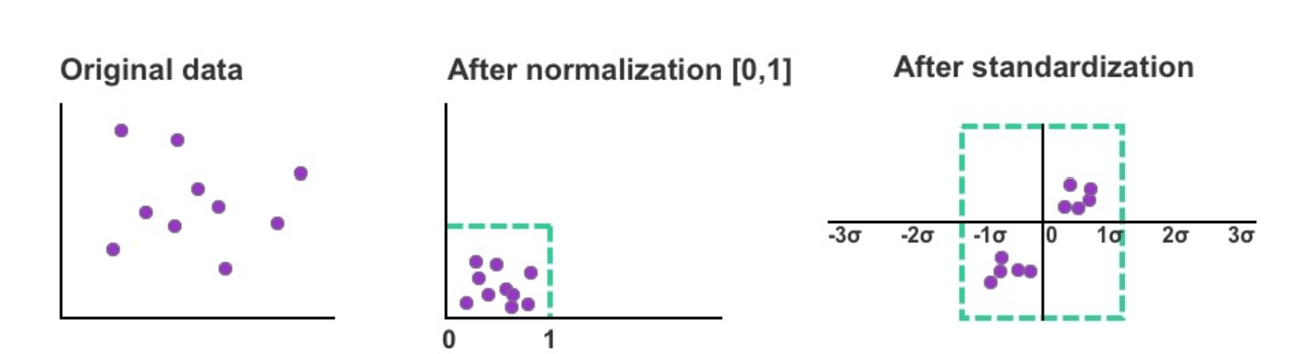

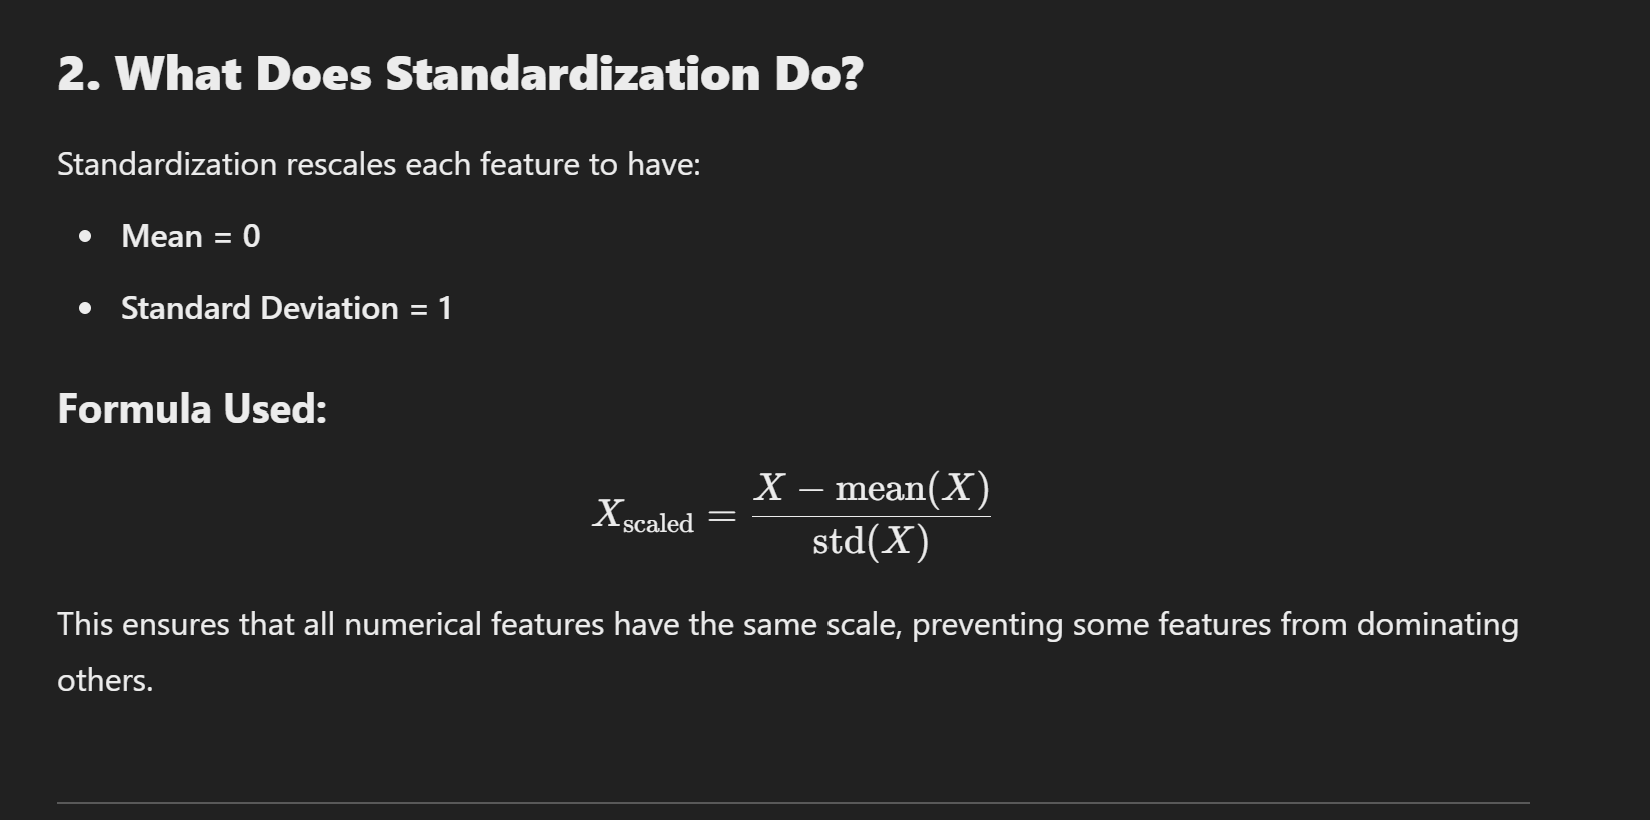

### Algorithms That Require Standardized Data
#### ✅ (A) Distance-Based Algorithms
These algorithms compute distances between points, so differences in feature scales can heavily impact performance:

K-Nearest Neighbors (KNN)
K-Means Clustering
Principal Component Analysis (PCA)
Support Vector Machines (SVM) with RBF Kernel
t-SNE, UMAP (for dimensionality reduction)
🔹 Why?
If one feature has much larger values than another, it dominates distance calculations and distorts results.

#### ✅ (B) Gradient-Based Optimization Algorithms
These algorithms use gradient descent, which can converge slowly if features have vastly different scales:

Logistic Regression
Linear Regression
Support Vector Machines (SVM) with Gradient Descent
Neural Networks (Deep Learning, MLPs, etc.)
🔹 Why?
Without standardization, one feature (e.g., income in thousands vs. age in years) could have much larger updates, causing unstable training.

### 2. Algorithms That DO NOT Require Standardization
Some models are scale-invariant and do not require feature standardization:

Tree-based Models:
Decision Trees
Random Forests
Gradient Boosting (XGBoost, LightGBM, CatBoost)
Naive Bayes: Assumes feature independence, so scaling is unnecessary.
🔹 Why?
Tree-based models split based on feature values rather than computing distances or gradients, making them robust to feature scale differences.

### 3. When to Use Standardization vs. Normalization
#### Standardization (StandardScaler):
Mean = 0, Standard Deviation = 1
Best for SVM, PCA, KNN, linear models
#### Normalization (MinMaxScaler):
Scales values between [0,1]
Best for Neural Networks, KNN (when feature range matters)
